In [83]:
import matplotlib.pyplot as plt

In [84]:
TIME = 0
DURATION = 15 #sec
DRONE_MASS = 1890 #kg
DELTA_T = 0.1 #s
FUEL_CONSUMPTION = 0.6831 #liters
DIAMETER = 10 #m
AREA = 1 #m2 #change to 1
TOP_AREA = 100 #m2
ANGLE_OF_ATTACK = 180 #degrees

THRUST_DURATION = 15 #s

In [85]:
class Drone():

    def __init__(self, drone_mass, delta_t, diameter, area, thrust_duration, attack_angle, top_area):
        self.top_area = top_area
        self.attack_angle = attack_angle
        self.thrust_duration = thrust_duration
        self.area =area
        self.diameter = diameter
        self.drone_mass = drone_mass
        self.delta_t = delta_t
        self.x_vel = 0
        self.y_vel = 0
        self.delta_x_vel = 0
        self.delta_y_vel = 0
        self.x_pos = 0
        self.y_pos = 500
        self.delta_x_pos = 0
        self.delta_y_pos = 0
        # self.a = 0
        # self.delta_a = 0

    def thrust(self):
        thrust = 1000 #N
                
        acceleration = thrust / self.drone_mass

        self.delta_x_vel += acceleration * self.delta_t

    def drag(self):
        density_of_air = 1.293 #kg m−3
        viscosity_of_air = 1.48*10**(-5) #m2/s

        cd0 = 0.08
        cda = 2.27

        drag_cooficient = cd0 + cda*((self.attack_angle)**2)
        # drag_cooficient = 0.08

        #Reynolds number
        #r_numebr = (density_of_air * self.x_vel * self.diameter)/viscosity_of_air

        #laminal:
        # if(r_numebr < 3750):
        #     pass

        # #turbulent:
        # else:
        #     pass

        drag = -0.5*density_of_air*(self.x_vel**2)*self.area*drag_cooficient

        acceleration = drag / self.drone_mass

        self.delta_x_vel += acceleration * self.delta_t


    def start_x(self):
        self.delta_x_vel = 0
        
        if self.thrust_duration > 0:
            self.thrust()
            self.thrust_duration -= self.delta_t
        else:
            print('DONE')

        self.drag()
        self.x_vel += self.delta_x_vel
        self.delta_x_pos = self.x_vel * self.delta_t
        self.x_pos += self.delta_x_pos

    def gravity(self):
        g = 9.81 #m/s2

        self.delta_y_vel += -g*self.delta_t

    def lift(self):
        density_of_air = 1.293 #kg m−3
        viscosity_of_air = 1.48*10**(-5) #m2/s

        cl0 = 0.15
        cla = 1.4

        lift_cooficient = cl0 + cla*self.attack_angle
        # lift_cooficient = 0.15

        lift = 0.5*density_of_air*(self.x_vel**2)*self.top_area*lift_cooficient

        acceleration = lift / self.drone_mass

        self.delta_y_vel += acceleration * self.delta_t

    def start_y(self):
        if self.y_pos <= 0:
            self.y_vel = 0
            self.x_vel = 0

        self.delta_y_vel = 0
        self.lift()
        self.gravity()
        self.y_vel += self.delta_y_vel
        self.delta_y_pos = self.y_vel * self.delta_t
        self.y_pos += self.delta_y_pos



In [86]:
TIME = 0
y_velocities = []
x_velocities = []
times = []
x_positions = []
y_positions = []

drone = Drone(DRONE_MASS, DELTA_T, DIAMETER, AREA, THRUST_DURATION, ANGLE_OF_ATTACK, TOP_AREA)

for t in range(0, int(30/DELTA_T)):
    drone.start_x()
    drone.start_y()
    x_velocities.append(drone.x_vel)
    y_velocities.append(drone.y_vel)
    x_positions.append(drone.x_pos)
    y_positions.append(drone.y_pos)
    TIME += DELTA_T
    times.append(TIME)
    print(drone.x_vel)






0.05291005291005291
0.10582009815932382
0.15873012042625317
0.2116401043893014
0.2645500347269666
0.31745989611780234
0.37036967324043546
0.4232793507735837
0.4761889133960735
0.5290983457868578
0.5820076326250335
0.6349167585898599
0.6878257083607754
0.7407344666174163
0.7936430180396339
0.8465513473075124
0.8994594391013866
0.9523672781018598
1.0052748489898216
1.058182136446465
1.111089125153305
1.1639957997921961
1.2169021450453497
1.2698081455953518
1.3227137861251814
1.3756190513182276
1.4285239258583076
1.4814283944296842
1.534332441717084
1.587236052405715
1.6401392111812836
1.6930419027300132
1.7459441117386618
1.7988458228945394
1.851747020885526
1.904647690400089
1.9575478161273014
2.010447382756859
2.063346374979099
2.116244777485016
2.1691425749662816
2.2220397521152613
2.274936293625032
2.3278321841894
2.380727408502919
2.433621951260907
2.4865157971594645
2.5394089308954926
2.59230133716671
2.645193000671671
2.698083906109783
2.7509740381813255
2.8038633815874645
2.85675

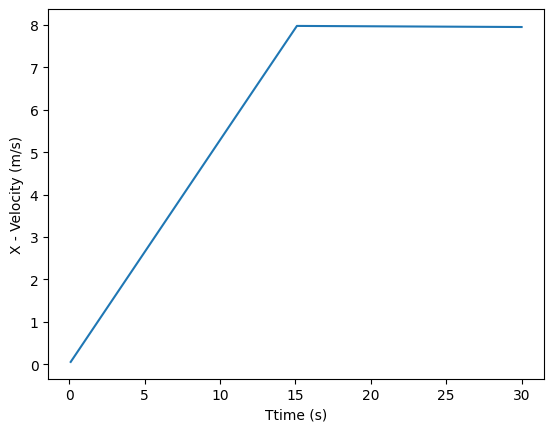

In [87]:
plt.plot(times, x_velocities)
plt.xlabel('Ttime (s)')
plt.ylabel('X - Velocity (m/s)')
plt.show()

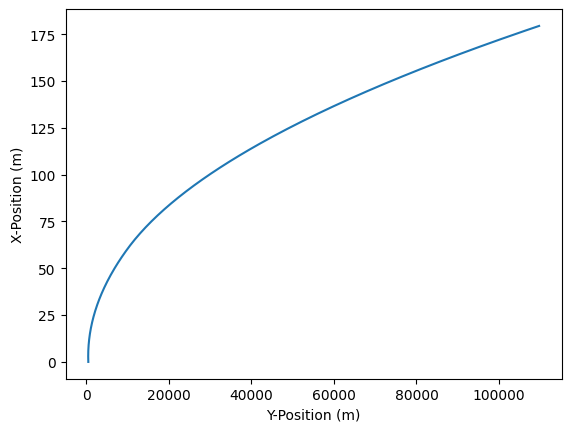

In [88]:
plt.plot(y_positions, x_positions)
plt.xlabel('Y-Position (m)')
plt.ylabel('X-Position (m)')
plt.show()

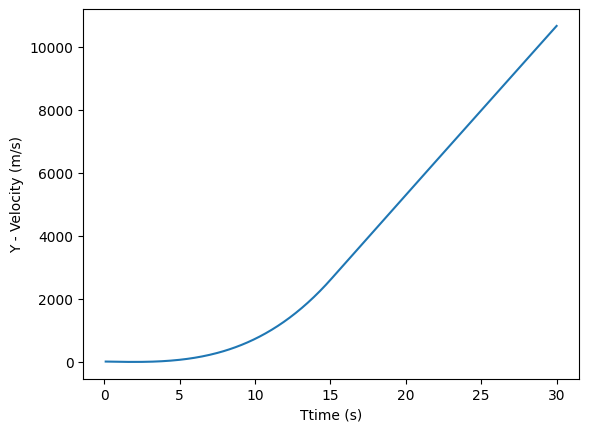

In [89]:
plt.plot(times, y_velocities)
plt.xlabel('Ttime (s)')
plt.ylabel('Y - Velocity (m/s)')
plt.show()